# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import of our own code
from inauguralproject import ExchangeEconomyClass

model = ExchangeEconomyClass()

# Question 1

**Explain how you solve the model**

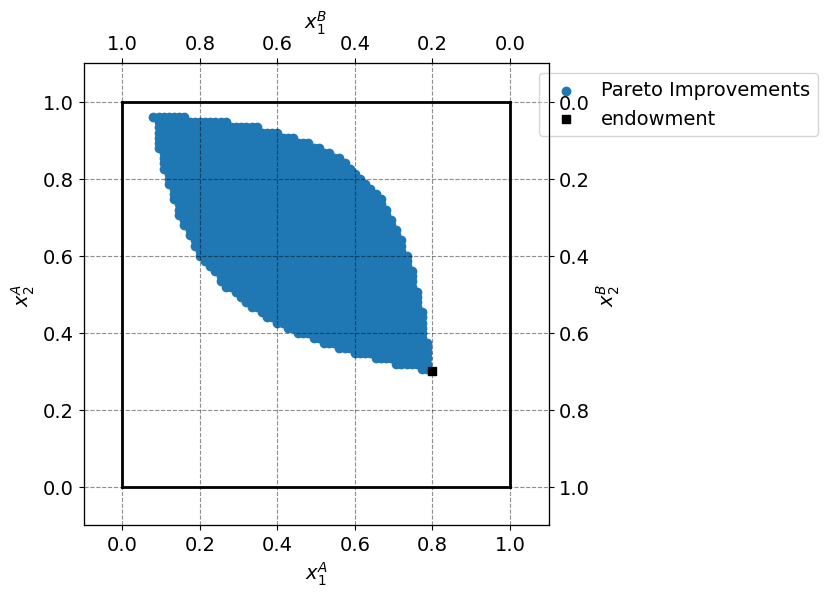

In [3]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Initialize lists to store valid combinations
valid_xA1 = []
valid_xA2 = []

# Set N
N = 75

# Iterate through possible combinations of xA1 and xA2
for xA1 in np.linspace(0, 1, N+1):
    for xA2 in np.linspace(0, 1, N+1):
        xB1 = 1 - xA1
        xB2 = 1 - xA2
        
        # Check conditions
        if model.utility_A(xA1, xA2) >= model.utility_A(par.w1A, par.w2A) and model.utility_B(xB1, xB2) >= model.utility_B(1 - par.w1A, 1 - par.w2A):
            valid_xA1.append(xA1)
            valid_xA2.append(xA2)

# Plot the Edgeworth box
ax_A.scatter(valid_xA1, valid_xA2, label='Pareto Improvements')


# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Question 2

Explain your code and procedure

In [4]:
par = model.par

# Number of divisions
N = 20

# Calculate P1
P1 = np.linspace(0.5, 2.5, num=N)

# Iterate over prices
for p1 in P1:
    # Calculate errors in market clearing condition
    eps1, eps2 = model.check_market_clearing(p1)
    
    # Print errors
    print(f"For p1 = {p1:.1f}, Error in market clearing for x1: {eps1:.2f}, Error in market clearing for x2: {eps2:.2f}")

For p1 = 0.5, Error in market clearing for x1: 0.53, Error in market clearing for x2: -0.27
For p1 = 0.6, Error in market clearing for x1: 0.34, Error in market clearing for x2: -0.20
For p1 = 0.7, Error in market clearing for x1: 0.20, Error in market clearing for x2: -0.14
For p1 = 0.8, Error in market clearing for x1: 0.09, Error in market clearing for x2: -0.08
For p1 = 0.9, Error in market clearing for x1: 0.02, Error in market clearing for x2: -0.01
For p1 = 1.0, Error in market clearing for x1: -0.05, Error in market clearing for x2: 0.05
For p1 = 1.1, Error in market clearing for x1: -0.10, Error in market clearing for x2: 0.11
For p1 = 1.2, Error in market clearing for x1: -0.14, Error in market clearing for x2: 0.18
For p1 = 1.3, Error in market clearing for x1: -0.18, Error in market clearing for x2: 0.24
For p1 = 1.4, Error in market clearing for x1: -0.21, Error in market clearing for x2: 0.30
For p1 = 1.6, Error in market clearing for x1: -0.24, Error in market clearing f

# Question 3

Explain your code and procedure

In [5]:
#IKKE RIGTIGT TROR JEG.
#Tror ikke det er rigtigt fordi error in market clearing for x1 og x2 ikke er 0 ved p1=2,5.

# Define tolerance
tolerance = 1e-6

# Iterate over prices
for price in P1:
    # Calculate errors in market clearing condition
    eps1, eps2 = model.check_market_clearing(price)
    
    # Check if errors are close to zero
    if abs(eps1) < tolerance and abs(eps2) < tolerance:
        # Market clearing price found
        print("Market clearing price:", price)
        break

# Print the market clearing price
print(price)

2.5


In [6]:
#Måske er det rigtigt. Her får jeg også 2,5

# Iterate over prices
for price in P1:
    if eps1 == 0 and eps1 == 0:
        print("Market clearing price:", price)
print(price)

2.5


# Question 4

In [7]:
# Define N
N = 75

# Define the price vector p1
P1 = np.linspace(0.5, 2.5, num=N)

# Initialize variables to store the optimal allocation and utility
optimal_allocation = None
max_utility = -np.inf

# Iterate through each p1 in P1
for p1 in P1:
    # Calculate the allocation for A given p1
    xB1, xB2 = model.demand_B(p1)
    # Calculate utility for A
    utility_A = model.utility_A(1 - xB1, 1 - xB2)
    # Check if utility is maximized
    if utility_A > max_utility:
        max_utility = utility_A
        optimal_allocation = (1 - xB1, 1 - xB2)

print("Optimal allocation for A:")
print(f"x1A: {optimal_allocation[0]}, x2A: {optimal_allocation[1]}")

Optimal allocation for A:
x1A: 0.6217494089834517, x2A: 0.6396396396396397


/Users/pernilleheiselberg/Desktop/Cand 2. semester/projects-2024-sarah-og-pernille/inauguralproject/inauguralproject.py:24: RuntimeWarning: invalid value encountered in scalar power
  return x1A**par.alpha*x2A**(1-par.alpha)


In [8]:
#Question 4B

import numpy as np
from scipy.optimize import minimize_scalar

# Define utility function for A
def utility_A(p1):
    xB1, xB2 = model.demand_B(p1)
    return -model.utility_A(1 - xB1, 1 - xB2)  # Minimize negative utility

# Perform optimization
result = minimize_scalar(utility_A, bounds=(0, 1000), method='bounded')

# Extract optimal price
optimal_price = result.x

# Calculate allocation for A given optimal price
optimal_xB1, optimal_xB2 = model.demand_B(optimal_price)
optimal_allocation = (1 - optimal_xB1, 1 - optimal_xB2)

print("Optimal allocation for A:")
print(f"x1A: {optimal_allocation[0]}, x2A: {optimal_allocation[1]}")
print(f"Optimal price chosen by A: {optimal_price}")

Optimal allocation for A:
x1A: 0.8654449174719168, x2A: -24.69773408334034
Optimal price chosen by A: 381.9660112501051


# Question 5

In [9]:
#Question 5A

# Define utility function for A
def utility_A(xA1, xA2):
    return model.utility_A(xA1, xA2)

# Initialize variables to store optimal allocation
optimal_xA1 = None
optimal_xA2 = None
max_utility = -np.inf

# Iterate through possible combinations of xA1 and xA2 in C
for xA1 in np.linspace(0, 1, N+1):
    for xA2 in np.linspace(0, 1, N+1):
        xB1 = 1 - xA1
        xB2 = 1 - xA2
        
        # Check if the combination is in C
        if model.utility_A(xA1, xA2) >= model.utility_A(par.w1A, par.w2A) and model.utility_B(xB1, xB2) >= model.utility_B(1 - par.w1A, 1 - par.w2A):
            # Calculate utility for A
            utility = utility_A(xA1, xA2)
            
            # Update optimal allocation if utility is higher
            if utility > max_utility:
                optimal_xA1 = xA1
                optimal_xA2 = xA2
                max_utility = utility

print("Optimal allocation for A:")
print(f"x1A: {optimal_xA1}, x2A: {optimal_xA2}")
print(f"Utility for A: {max_utility}")

Optimal allocation for A:
x1A: 0.56, x2A: 0.8533333333333334
Utility for A: 0.7415523509091093


In [10]:
#Question 5B

from scipy.optimize import minimize

# Define utility function for A
def utility_A(x):
    return -model.utility_A(x[0], x[1])  # Minimize negative utility for maximization

# Define constraint function to ensure B's utility is not worse than in initial endowment
def constraint(x):
    return model.utility_B(1 - x[0], 1 - x[1]) - model.utility_B(par.w1A, par.w2A)

# Initial guess
x0 = [0.5, 0.5]

# Define bounds for xA1 and xA2
bounds = [(0, 1), (0, 1)]

# Define constraint dictionary
constraint_dict = {'type': 'ineq', 'fun': constraint}

# Perform optimization
result = minimize(utility_A, x0, bounds=bounds, constraints=constraint_dict)

# Extract optimal allocation for A
optimal_xA1, optimal_xA2 = result.x

# Calculate utility for A
max_utility = -result.fun

print("Optimal allocation for A:")
print(f"x1A: {optimal_xA1}, x2A: {optimal_xA2}")
print(f"Utility for A: {max_utility}")

Optimal allocation for A:
x1A: 0.28945890900713517, x2A: 0.6197031378508463
Utility for A: 0.48082248696277985


# Question 6
Vi finder den allokering der maksimerer den samlede velstand eller nytte i samfundet.

In [12]:
#Question 6A
# Define the objective function to maximize aggregate utility
def objective(x):
    return -model.utility_A(x[0], x[1]) - model.utility_B(1 - x[0], 1 - x[1])

# Define the initial guess
x0 = [0.5, 0.5]

# Define the bounds for xA1 and xA2
bounds = [(0, 1), (0, 1)]

# Perform optimization
result = minimize(objective, x0, bounds=bounds)

# Extract optimal allocation for A and B
optimal_xA1, optimal_xA2 = result.x
optimal_xB1 = 1 - optimal_xA1
optimal_xB2 = 1 - optimal_xA2

# Print the results
print(f"Optimal allocation for A: xA1 = {optimal_xA1}, xA2 = {optimal_xA2}")
print(f"Optimal allocation for B: xB1 = {optimal_xB1}, xB2 = {optimal_xB2}")

Optimal allocation for A: xA1 = 0.3333333659693852, xA2 = 0.6666666247827484
Optimal allocation for B: xB1 = 0.6666666340306149, xB2 = 0.3333333752172516


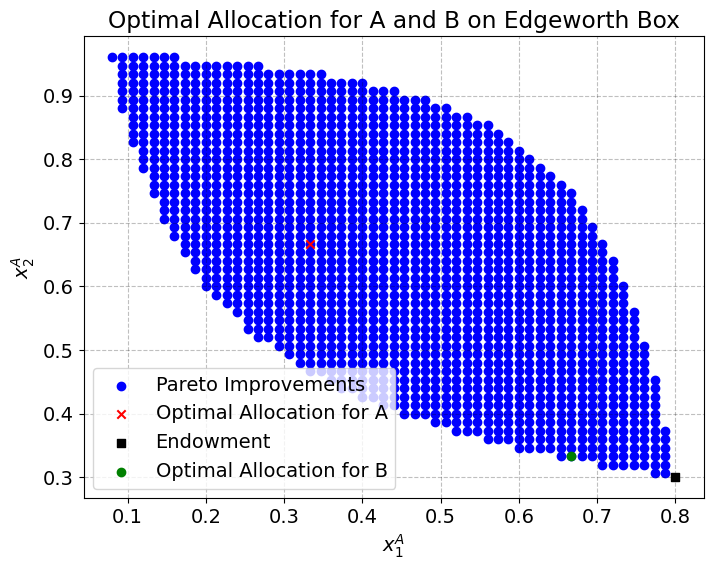

In [19]:
#Question 6B
# Plot the Edgeworth box
plt.figure(figsize=(8, 6))
plt.scatter(valid_xA1, valid_xA2, label='Pareto Improvements', c='blue')
plt.scatter(optimal_xA1, optimal_xA2, marker='x', c='red', label='Optimal Allocation for A')
plt.scatter(par.w1A, par.w2A, marker='s', color='black', label='Endowment')
plt.scatter(optimal_xB1, optimal_xB2, marker='o', c='green', label='Optimal Allocation for B')
plt.xlabel("$x_1^A$")
plt.ylabel("$x_2^A$")
plt.title('Optimal Allocation for A and B on Edgeworth Box')
plt.legend()
plt.grid(True)
plt.show()

ADD CONCISE CONLUSION.